## K-Means Clustering

K-Means is a method for the clustering of unlabeled data (Unsupervised Learning). It splits the data points into k clusters. The goal is to find the k best clusterings with cluster centers that minimize the distances of the data points to that centers. The best choice for k can be determined with the elbow method (not shown in this example).

In [81]:
from sklearn.datasets import make_blobs
import numpy as np
from scipy.spatial.distance import euclidean
import math
import random
from matplotlib import pyplot as plt

### Generate synthetic data

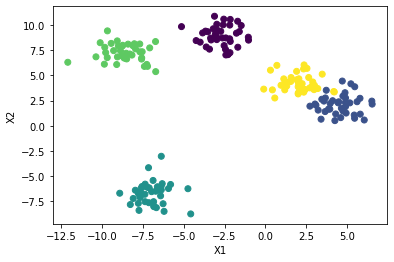

In [98]:
X, y = make_blobs(n_samples=200, n_features=2, centers=5, random_state=42)
random_centers, _ = make_blobs(n_samples=3, n_features=2, random_state=42)

# plot blobs
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()  
            

### K-means with Lloyd's algorithm

In [130]:
def empty_clusters(k):
    clusters = []
    for i in range(k):
        clusters.append([])
    return clusters  

class KMeans:
    # apply Lloyd's algorithms
    def cluster(self, X, k, iterations=100, random_centers=True):
        self.k = k
        # random initialization
        self.centers, _ = make_blobs(n_samples=k, n_features=2, random_state=42)        
            
        if(self.centers.shape[1] != X.shape[1]):
            print("Dimensions are not valid.")
            return
            
        for i in range(iterations):
            self.clusters = empty_clusters(k) 
            
            # assign points to clusters
            for x in X:  
                curr_idx = -1
                min_dist = math.inf            
                for j in range(k):
                    if(euclidean(x, self.centers[j]) < min_dist):
                        min_dist = euclidean(x, self.centers[j])
                        curr_idx = j
                self.clusters[curr_idx].append(x)
                                            
            # calculate new centers
            self.prev_centers = self.centers.copy()
            self.update_centers()           
            if(self.isConverged()):
                print("Centers converged!")
                break        
            
    # calculate the new center points 
    def update_centers(self):
        for i in range(self.k):
            self.centers[i] = np.mean(self.clusters[i], axis=0)
            
    # check if all centers converged
    def isConverged(self, tol=1e-2):       
        return np.all([np.all(np.abs(self.centers[i] - self.prev_centers[i]) < tol) for i in range(self.k)])
                      
    # sum of squared distances
    def SSD(self):
        ssd = 0 
        for i, cluster in enumerate(self.clusters):
            for x in cluster:
                ssd += euclidean(x, self.centers[i])**2
        return ssd
                
    # farthest first heuristic for initial centroids
    # not implemented yet !!! 
    def farthest_first_centers(self, X):
        Y = X
        first = random.choice(new_X)
        new_X = new_X.remove(first)
        centers = [first]
        for i in range(self.k-1):
            break
            

### Testing the K-Means

Centers converged!
Sum of squared distances: 350.57516539138084


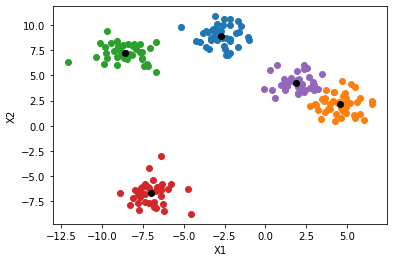

In [132]:
kmeans = KMeans()
kmeans.cluster(X, 5)
clusters = kmeans.clusters
centers = kmeans.centers
print("Sum of squared distances: {}".format(kmeans.SSD()))

for cluster in clusters:
    x_vals = [p[0] for p in cluster]
    y_vals = [p[1] for p in cluster]
    plt.scatter(x_vals, y_vals)    

plt.scatter(centers[:,0], centers[:,1], c='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()